In [10]:
!pip uninstall -y qiskit qiskit-aer
!pip install qiskit==1.1.0 qiskit-aer==0.17.2

Found existing installation: qiskit 1.1.2
Uninstalling qiskit-1.1.2:
  Successfully uninstalled qiskit-1.1.2
Found existing installation: qiskit-aer 0.17.2
Uninstalling qiskit-aer-0.17.2:
  Successfully uninstalled qiskit-aer-0.17.2
  Using cached qiskit_aer-0.17.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 32.1 MB/s eta 0:00:00
Using cached qiskit_aer-0.17.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)


In [7]:
!pip install "qiskit~=1.1.0" --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 16.8 MB/s eta 0:00:00


In [5]:
!pip install qiskit qiskit_aer


# New section# 📌 Single-Qubit Gates and Bloch Sphere

This notebook shows how a single qubit changes when we apply different quantum gates.  
Each gate is explained in three parts: (1) meaning, (2) maths, (3) Bloch sphere movement.

---

## 🔹 Starting state: |0⟩
\[
|0⟩ = \begin{bmatrix}1 \\ 0\end{bmatrix}
\]

- Probability = 100% for 0  
- Bloch sphere = North pole (+Z)

---

## 🔸 X Gate
**Meaning:** flips |0⟩ to |1⟩  
\[
X = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}
\quad X|0⟩ = |1⟩
\]

- Probability = 100% for 1  
- Bloch = +Z → –Z  

🟢 Simple: X is a flip.

---

## 🔸 Y Gate
**Meaning:** flips like X, but also adds phase  
\[
Y = \begin{bmatrix}0 & -i \\ i & 0\end{bmatrix}
\quad Y|0⟩ = i|1⟩
\]

- Measurement still gives 1  
- Bloch = rotation around Y axis  

🟢 Simple: Y = flip + twist.

---

## 🔸 Z Gate
**Meaning:** only changes phase (no flip)  
\[
Z = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}
\]

- Probabilities stay same  
- Bloch = +X → –X (equator flip)

🟢 Simple: Z changes phase without changing probability.

---

## 🔸 H Gate (Hadamard)
**Meaning:** creates superposition  
\[
H|0⟩ = \frac{|0⟩ + |1⟩}{\sqrt{2}} = |+⟩
\]

- Probability ≈ 50% for 0 and 50% for 1  
- Bloch = +Z → +X (equator)

🟢 Simple: H spreads the qubit between 0 and 1 equally.

---

## 🔸 S Gate (Phase +90°)
Adds 90° phase on |1⟩  
\[
S = \begin{bmatrix}1 & 0 \\ 0 & i\end{bmatrix}
\]

- Bloch = rotation around Z axis  
🟢 Simple: S is a quarter-turn around Z.

---

## 🔸 T Gate (Phase +45°)
Adds 45° phase on |1⟩  
\[
T = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/4}\end{bmatrix}
\]

- Bloch = small rotation around Z axis  
🟢 Simple: T is a smaller version of S.

---

## 🌟 Quick Summary

| Gate | Action | Bloch effect |
|------|--------|--------------|
| X | Flip | +Z → –Z |
| Y | Flip + Phase | Rotate around Y |
| Z | Phase only | +X ↔ –X |
| H | Superposition | +Z → +X |
| S | +90° Phase | Rotate around Z |
| T | +45° Phase | Small rotate around Z |

---

## 🧠 Memory line for interviews / teaching
> A qubit is a point on the Bloch sphere.  
> X rotates vertically, Z rotates horizontally, Y rotates sideways,  
> and H pulls the qubit into the equator to create superposition.

---


Initial state |0>
Statevector: [1.+0.j 0.+0.j]


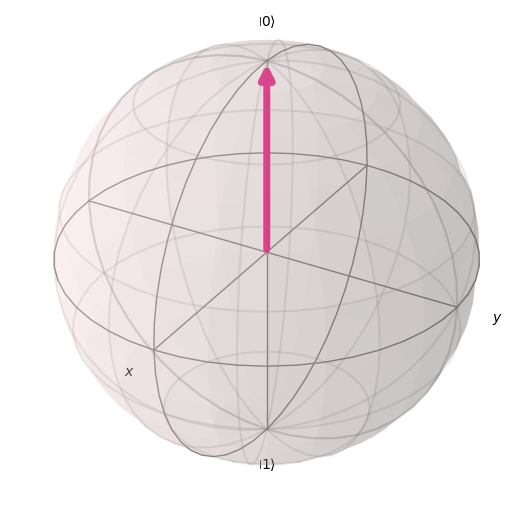

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
def bloch(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]
qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)
print("Initial state |0>")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))



After X gate → |1>
Statevector: [0.+0.j 1.+0.j]


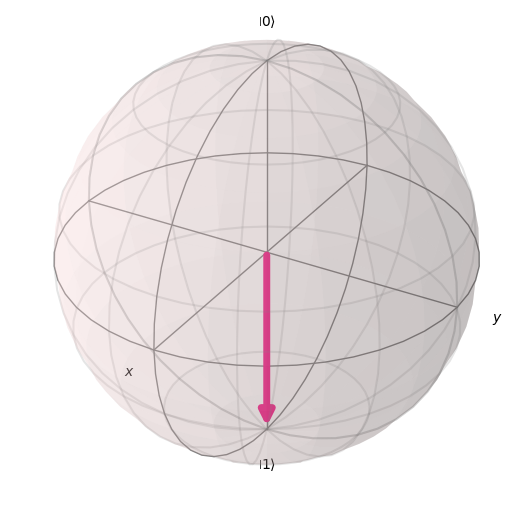

In [9]:
qc = QuantumCircuit(1)
qc.x(0)
state = Statevector.from_instruction(qc)
print("After X gate → |1>")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))




After Y gate
Statevector: [0.+0.j 0.+1.j]


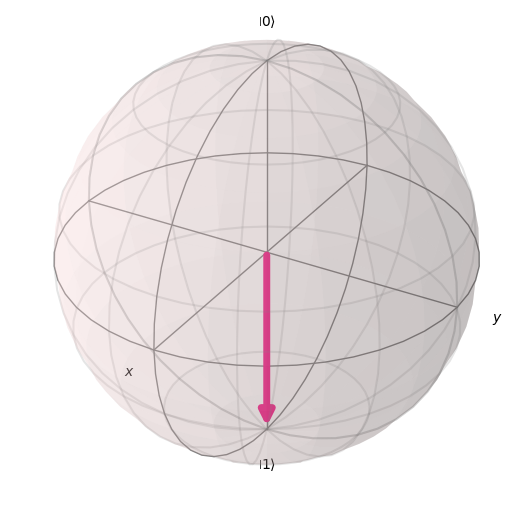

In [11]:
qc = QuantumCircuit(1)
qc.y(0)
state = Statevector.from_instruction(qc)
print("After Y gate")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


After H gate → |+>
Statevector: [0.70710678+0.j 0.70710678+0.j]


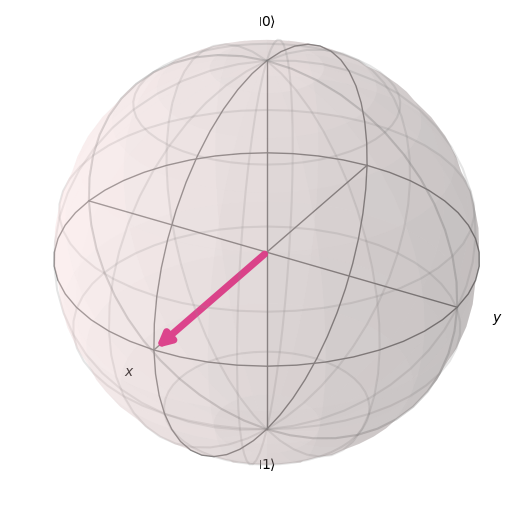

In [12]:
qc = QuantumCircuit(1)
qc.h(0)
state = Statevector.from_instruction(qc)
print("After H gate → |+>")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


After Z gate → |- > (phase flip on |1>)
Statevector: [ 0.70710678+0.j -0.70710678+0.j]


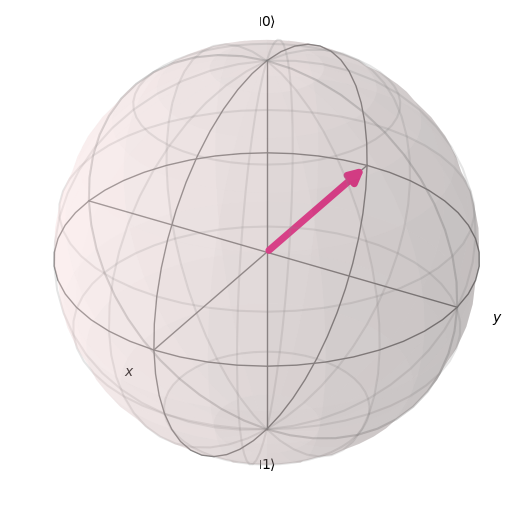

In [13]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
state = Statevector.from_instruction(qc)
print("After Z gate → |- > (phase flip on |1>)")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


After S gate (90° phase rotation)
Statevector: [0.70710678+0.j         0.        +0.70710678j]


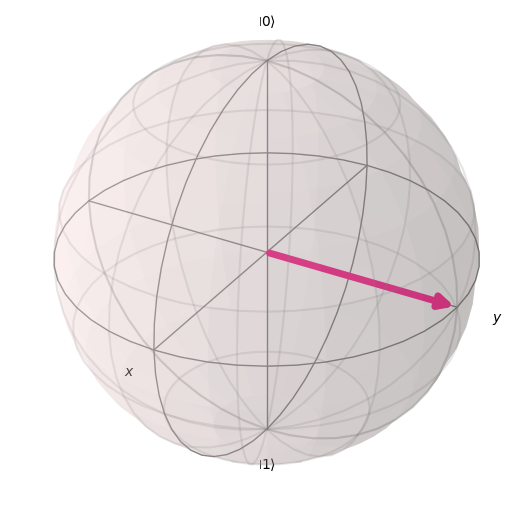

In [14]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
state = Statevector.from_instruction(qc)
print("After S gate (90° phase rotation)")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


After T gate (45° phase rotation)
Statevector: [0.70710678+0.j  0.5       +0.5j]


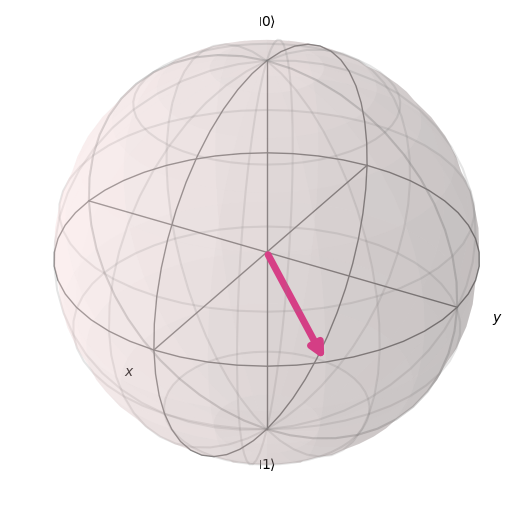

In [15]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
state = Statevector.from_instruction(qc)
print("After T gate (45° phase rotation)")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


H then Y: Y adds phase twist to the superposition created by H
Statevector: [0.-0.70710678j 0.+0.70710678j]


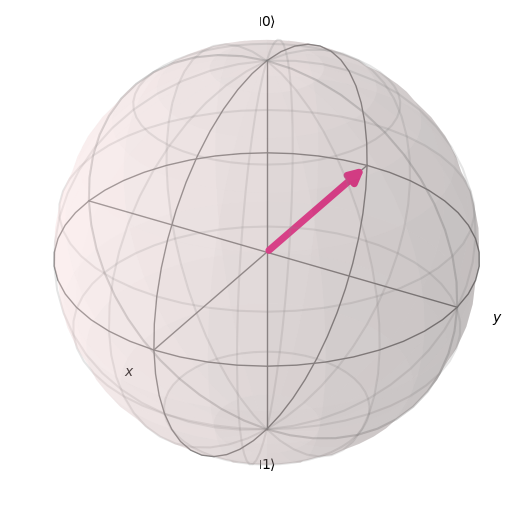

In [18]:
# Combination 1: H then Y
qc = QuantumCircuit(1)
qc.h(0)   # create |+>
qc.y(0)   # add flip + phase
state = Statevector.from_instruction(qc)
print("H then Y: Y adds phase twist to the superposition created by H")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


Y then H: the superposition shifts because Y added phase before H
Statevector: [0.+0.70710678j 0.-0.70710678j]


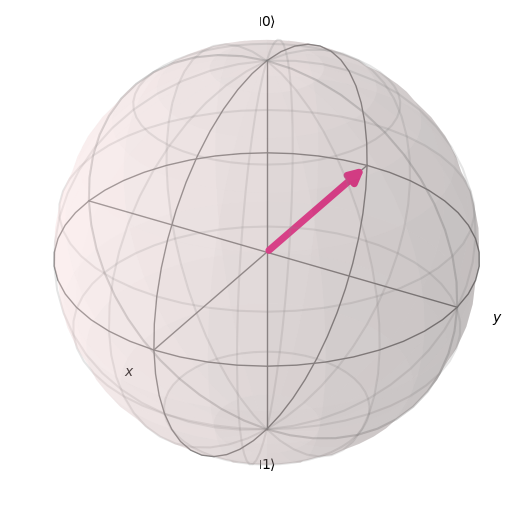

In [21]:
# Combination 2: Y then H
qc = QuantumCircuit(1)
qc.y(0)   # flip + phase
qc.h(0)   # try to create superposition again
state = Statevector.from_instruction(qc)
print("Y then H: the superposition shifts because Y added phase before H")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


Z then Y: applying Z first modifies how Y behaves
Statevector: [0.-1.j 0.+0.j]


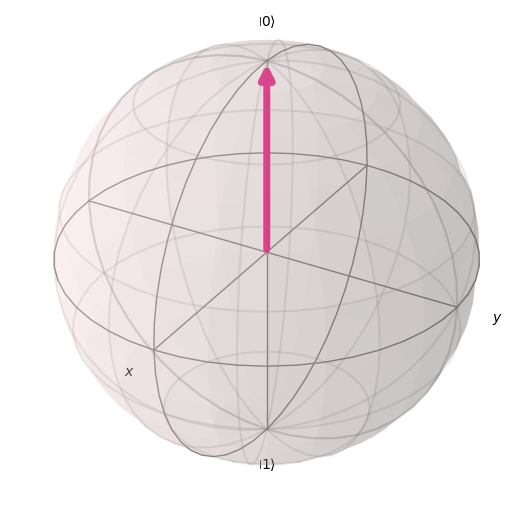

In [27]:
# Combination 3: Z then Y
qc = QuantumCircuit(1)
qc.x(0)   # phase only
qc.y(0) # flip + extra phase
state = Statevector.from_instruction(qc)
print("Z then Y: applying Z first modifies how Y behaves")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


Y then S: very strong phase rotation
Statevector: [1.+0.j 0.+0.j]


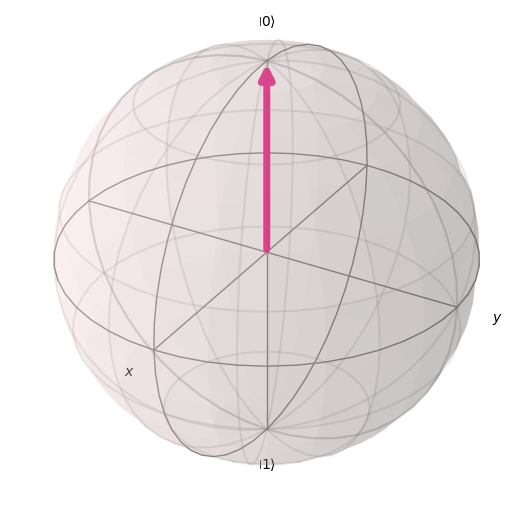

In [24]:
# Combination 5: Y then S
qc = QuantumCircuit(1)
#qc.y(0)
qc.s(0)
state = Statevector.from_instruction(qc)
print("Y then S: very strong phase rotation")
print("Statevector:", state.data)
plot_bloch_vector(bloch(state))


🔹 Single Qubit State Demonstration 🔹

State: |0>


┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

Probabilities: {'0': 1024}

State: |1> (after X gate)


┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

Probabilities: {'1': 1024}

State: |+> (after H gate)


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

Probabilities: {'1': 514, '0': 510}

State: |- > (after X then H)


┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

Probabilities: {'0': 524, '1': 500}

Circuit with Y and Z applied on |+> state


┌───┐┌───┐┌───┐
q: ┤ H ├┤ Z ├┤ Y ├
   └───┘└───┘└───┘


Bloch sphere example for |+> state


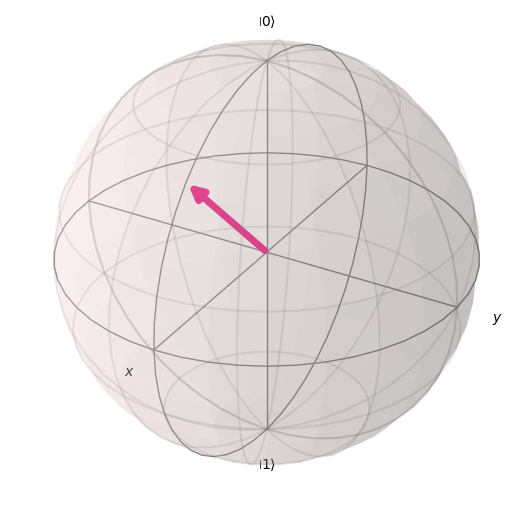

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_vector
import numpy as np

# Function to measure qubit probabilities
def get_probabilities(circuit):
    backend = Aer.get_backend("qasm_simulator")
    job = backend.run(circuit, shots=1024)
    result = job.result()
    return result.get_counts()

print("🔹 Single Qubit State Demonstration 🔹")

# 1) |0> State (default qubit)
qc_0 = QuantumCircuit(1, 1)
qc_0.measure(0, 0)
print("\nState: |0>")
display(qc_0.draw())
print("Probabilities:", get_probabilities(qc_0))


# 2) |1> State by applying X gate
qc_1 = QuantumCircuit(1, 1)
qc_1.x(0)
qc_1.measure(0, 0)
print("\nState: |1> (after X gate)")
display(qc_1.draw())
print("Probabilities:", get_probabilities(qc_1))


# 3) |+> Superposition using H gate
qc_plus = QuantumCircuit(1, 1)
qc_plus.h(0)
qc_plus.measure(0, 0)
print("\nState: |+> (after H gate)")
display(qc_plus.draw())
print("Probabilities:", get_probabilities(qc_plus))


# 4) |- > Superposition using X then H
qc_minus = QuantumCircuit(1, 1)
qc_minus.x(0)
qc_minus.h(0)
qc_minus.measure(0, 0)
print("\nState: |- > (after X then H)")
display(qc_minus.draw())
print("Probabilities:", get_probabilities(qc_minus))


# 5) Y and Z gates demonstration
qc_yz = QuantumCircuit(1)
qc_yz.h(0)
qc_yz.z(0)
qc_yz.y(0)
print("\nCircuit with Y and Z applied on |+> state")
display(qc_yz.draw())

# Bloch vector example for |+> state
print("\nBloch sphere example for |+> state")
plot_bloch_vector([1 / np.sqrt(2), 0, 1 / np.sqrt(2)])